In [1]:
import pandas as pd
import numpy as np
from pylab import *
%matplotlib inline

In [2]:
df = pd.read_csv('~/Desktop/Workbook1.csv')
df.head()

,Sub_ID,Pre1,Pre2,Pre3,Post1,Post2,Post3
0,1,0.5,0.60,0.33,0.80,0.55,1.10
1,2,0.3,0.77,0.40,0.64,0.77,1.10
2,3,0.2,0.88,0.56,0.99,0.66,0.99
3,4,0.4,0.99,67.00,0.88,0.33,0.92
4,5,0.6,0.11,0.78,0.92,0.99,0.79


In [6]:
Pr1 = df['Pre1']
Pr2 = df['Pre2']
Pr3 = df['Pre3']
Po1 = df['Post1']
Po2 = df['Post2']
Po3 = df['Post3']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

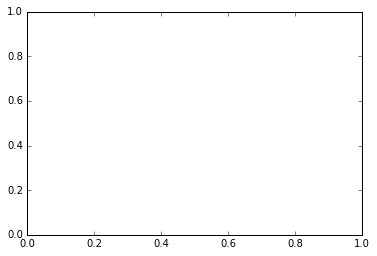

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

n = 3
x_pos = np.arange(n)
width = .3
x_pos2 = x_pos + width

y = [Pr1, Pr2, Pr3]
y2 = [Po1, Po2, Po3]

x = range(len(y))
x2 = range(len(y2))


rects1 = ax.bar(x_pos, y, width, color='black')

rects2 = ax.bar(x_pos2, y2, width, color='red')

ax.set_xlim(-width,len(x_pos)+width)
ax.set_ylim(0,10)
ax.set_ylabel('Mean value')
ax.set_title('Scores by group and timepoints')
ax.set_xticks(x_pos2)
ax.set_xticklabels(['h','b', 'y'])
## add a legend
ax.legend( (rects1[0], rects2[0]), ('Pre', 'Post') )

plt.show()

In [ ]:
import pyvttbl as pt

In [ ]:
%load_ext rpy2.ipython

In [ ]:
cond1a = df['Pre1'].tolist()
cond2a = df['Pre2'].tolist()
cond3a = df['Pre3'].tolist()
cond1b = df['Post1'].tolist()
cond2b = df['Post2'].tolist()
cond3b = df['Post3'].tolist()

a = [cond1a, cond2a]

In [ ]:
%Rpush cond1a cond2a cond3a cond1b cond2b cond3b

In [ ]:
%R Factor1 <- c('A','A','A','B','B','B')
%R Factor2 <- c('cond1a','cond2a','cond3a','cond1b','cond2b','cond3b')
%R idata <- data.frame(Factor1, Factor2)

In [ ]:
%R Bind <- cbind(cond1a, cond2a, cond3a, cond1b, cond2b, cond3b)
%R model <- lm(Bind~1)

%R library(car)
%R analysis <- Anova(model, idata=idata, idesign=~Factor1*Factor2, type="III")

In [ ]:
%R anova_sum = summary(analysis)

#move the data from R to python
%Rpull anova_sum
print anova_sum

In [4]:
import scipy.stats as stats

In [7]:
a = stats.ttest_rel(Pr1, Po1)

In [8]:
print(a)

Ttest_relResult(statistic=-2.2452301497514631, pvalue=0.05140225193557179)


In [9]:
b = stats.shapiro(Pr1)

In [10]:
print(b)

(0.9433295726776123, 0.5906212329864502)


[<matplotlib.text.Text at 0x11da31590>, <matplotlib.text.Text at 0x11e3bea10>]

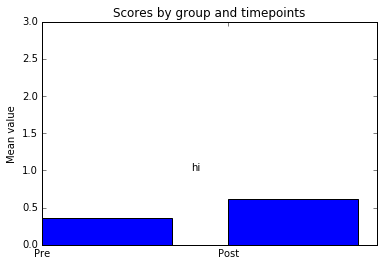

In [63]:
fig, ax = plt.subplots()
                   #use may also need add this 
y = [Pr1.mean(), Po1.mean()]
N = len(y)
x = range(N)
width = .7
ax.bar(x, y, width, color="blue")
ax.annotate('hi', xy=(.8,1), xytext=(.8,1))
ax.set_ylim(0,3)
ax.set_ylabel('Mean value')
ax.set_title('Scores by group and timepoints')
ax.set_xticks(x)
ax.set_xticklabels(['Pre','Post'])
#ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")

(0, 2)

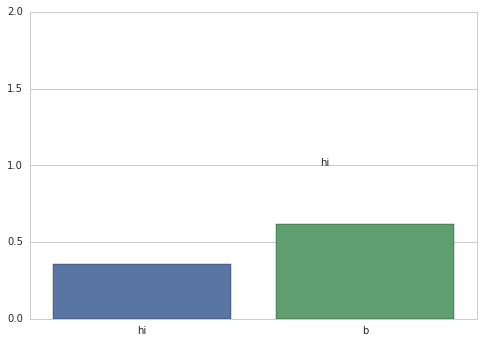

In [70]:
import seaborn as sns
sns.set_style("whitegrid")

ax1 = sns.barplot(x,y)
ax1.annotate('hi', xy=(.8,1), xytext=(.8,1))
labels=['hi', 'b']
ax1.set_xticklabels(labels)
ax1.set_ylim(0,2)
